# Daily Object Packaging Image Classification

**Brief Problem Statement**
This project focuses on developing a multi-class image classification system designed to identify various types of consumer product packaging. Given its utility in retail analytics, inventory automation, and sustainable recycling systems, automated packaging recognition remains a highly relevant field of study. Leveraging the vast availability of e-commerce and promotional imagery online, I will compile a custom dataset using DuckDuckGo image scraping. The dataset will prioritize clear, front-facing views while maintaining diverse environmental and branding variations. Following a rigorous cleaning and preprocessing phase, the data will be used to benchmark three distinct deep learning architectures. The final model selection will be determined by a comparative analysis of validation accuracy and loss metrics.

**Categories**
1. Bottled Water
2. Soft Drink Cans
3. Milk Cartons
4. Snack Chips Packets
5. Chocolate Bars
6. Instant Noodles Packets
7. Toothpaste Boxes
8. Shampoo Bottles
9. Soap Bars
10. Cooking Oil Bottles
11. Coffee Jars
12. Detergent Packs

In [1]:
!pip install -Uqq fastai gradio nbdev

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.8 MB/s eta 0:00:00


In [2]:
from fastai.vision.all import *

In [3]:
from fastai.vision.all import load_learner
import gradio as gr

In [6]:
%cd /content/drive/MyDrive/Capstone2/daily_object_packaging_image

/content/drive/MyDrive/Capstone2/daily_object_packaging_image


In [9]:
!ls models/

pkg_recognizer_v1.pkl  pkg_recognizer_v1.pth


In [10]:
model = load_learner('models/pkg_recognizer_v1.pkl')

/usr/local/lib/python3.12/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [41]:
pkg_labels = (
    "Bottled Water",
    "Chocolate Bars",
    "Coffee Jars",
    "Cooking Oil Bottles",
    "Detergent Packs",
    "Instant Noodles Packets",
    "Milk Cartons",
    "Shampoo Bottles",
    "Snack Chips Packets",
    "Soap Bars",
    "Soft Drink Cans",
    "Toothpaste Boxes",
)

def recognize_image(image):
  pred, idx, probs = model.predict(image)
  return dict(zip(pkg_labels, map(float, probs)))

In [42]:
!ls images/

Bottled_Water	Cooking_Oil_Bottles	 Milk_Cartons	      Soap_Bars
Chocolate_Bars	Detergent_Packs		 Shampoo_Bottles      Soft_Drink_Cans
Coffee_Jars	Instant_Noodles_Packets  Snack_Chips_Packets  Toothpaste_Boxes


In [43]:
!ls test_images/

1.jpeg	2.jpg  3.jpg  4.jpeg


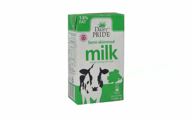

In [44]:
img = PILImage.create(f'test_images/1.jpeg')
img.thumbnail((192,192))
img

In [45]:
results = recognize_image(img)
percentages = {k: round(v * 100, 2) for k, v in results.items()}

In [46]:
percentages

{'Bottled Water': 0.0,
 'Chocolate Bars': 0.01,
 'Coffee Jars': 0.0,
 'Cooking Oil Bottles': 0.01,
 'Detergent Packs': 0.0,
 'Instant Noodles Packets': 0.02,
 'Milk Cartons': 97.38,
 'Shampoo Bottles': 0.02,
 'Snack Chips Packets': 0.0,
 'Soap Bars': 0.03,
 'Soft Drink Cans': 0.0,
 'Toothpaste Boxes': 2.52}

In [47]:
image = gr.Image()
label = gr.Label()

examples = [
    'test_images/1.jpeg',
    'test_images/2.jpg',
    'test_images/3.jpg',
    'test_images/4.jpeg'
]

iface = gr.Interface(
    fn=recognize_image,
    inputs=image,
    outputs=label,
    examples=examples
)

iface.launch(inline=False)

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://6300198ba31845a2b6.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
